In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

# 데이터 준비

## 데이터 다운로드

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


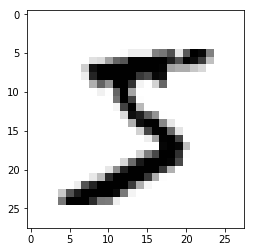

0


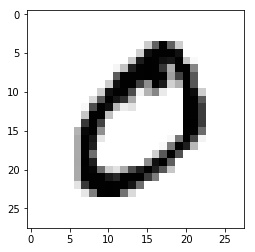

4


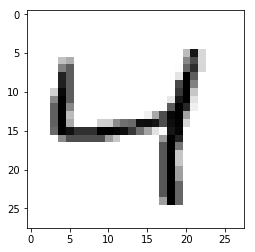

1


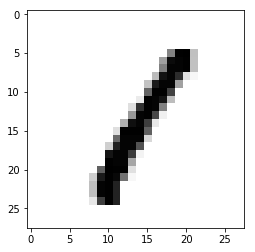

In [ ]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()


## Normalization

In [ ]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


255
255
1.0
1.0


In [ ]:
data_count = train_x.shape[0]
data_size = train_x.shape[1]*train_x.shape[2]
train_x = train_x.reshape((data_count, data_size))

data_count = test_x.shape[0]
test_x = test_x.reshape((data_count, data_size))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


# 모델 준비

In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

W0826 03:27:13.162246 140558552479616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8976 - acc: 0.7471
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3409 - acc: 0.9021
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2964 - acc: 0.9157
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2727 - acc: 0.9217
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2583 - acc: 0.9266


In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.2595 - acc: 0.9225
loss= 0.2595404890090227
acc= 0.9225


[[3.5815305e-04 6.9492700e-10 1.1488014e-03 ... 9.9681515e-01
  2.7782439e-06 3.6880595e-04]
 [3.5999725e-05 1.0702840e-07 9.8896360e-01 ... 6.8557866e-09
  2.8125418e-05 4.6383571e-11]
 [1.9099911e-05 9.8253113e-01 4.7442825e-03 ... 1.3280561e-03
  5.6291544e-03 1.3055060e-04]
 ...
 [1.2460360e-07 1.8950567e-08 9.7403363e-06 ... 8.1810256e-05
  8.0671557e-04 9.1458419e-03]
 [1.1285246e-08 4.2120849e-09 1.6745187e-09 ... 6.0491803e-13
  8.9879072e-04 6.6624882e-05]
 [2.2069853e-06 2.6737762e-15 1.7006374e-05 ... 1.0593926e-14
  5.3742686e-09 1.5430878e-09]]
[7 2 1 ... 4 5 6]
7


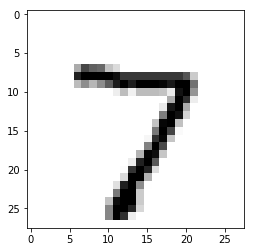

2


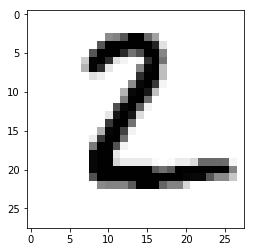

1


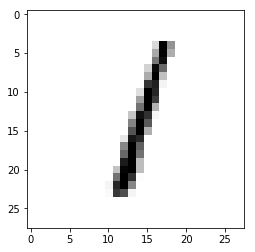

0


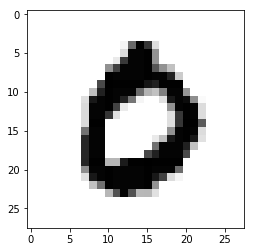

In [ ]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(raw_test_y[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

# 한눈에 모아보면

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.9044 - acc: 0.7136
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3927 - acc: 0.8880
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3307 - acc: 0.9058
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss:

# Flatten 레이어 사용

(None, 28, 28) shape의 train_x를 그대로 사용.

모델의 처음에 Flatten() 레이어를 두어, 입력 모양을 변경한다.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

# data_count = train_x.shape[0] # COMMENT OUT
# data_size = train_x.shape[1]*train_x.shape[2] # COMMENT OUT
# train_x = train_x.reshape((data_count, data_size)) # COMMENT OUT

# data_count = test_x.shape[0] # COMMENT OUT
# test_x = test_x.reshape((data_count, data_size)) # COMMENT OUT


In [ ]:

model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28))) # ADD
# model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [=========================

# DNN classification Template

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 1.0497 - acc: 0.6647
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4016 - acc: 0.8855
Epoch 3/5
60000/60000 [========================

# Normalization

## Normalization을 하지 않으면

위에서는 0 ~ 255의 값을 0 ~ 1로 normalization하여 학습했다.

이 과정을 생략하고 그대로 실행한다.

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255



In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## -1 ~ 1로 Normalization 하면

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/127.5 - 1
test_x = test_x/127.5 - 1


In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 1.3357 - acc: 0.5336
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.7027 - acc: 0.7702
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## -255 ~ 255로 하면

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x*2 - 255
test_x = test_x*2 - 255

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 4.1636 - acc: 0.1091
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 2.3027 - acc: 0.1123
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization 안했을 때 보다 더디게 진행된다.

아래는 normalization을 안했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 1.7553 - acc: 0.3037
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6404 - acc: 0.3354
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5597 - acc: 0.3471
10000/10000 [==============================] - 0s 26us/sample - loss: 1.5352 - acc: 0.3417
loss= 1.5351685056686402
acc= 0.3417
```

## 0 ~ 0.5로 하면

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255/2
test_x = test_x/255/2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0266 - acc: 0.6823
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4344 - acc: 0.8783
Epoch 3/5
60000/60000 [=========================

학습이 되며 0~1로 normalization했을 때 보다 살짝 더디다

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## 0 ~ 2로 하면

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255*2
test_x = test_x/255*2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.7630 - acc: 0.7654
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3363 - acc: 0.9045
Epoch 3/5
60000/60000 [=========================

학습이 되며 0~1로 normalization했을 때 보다 살짝 빠르다

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```